# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project aims to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, there will be two artifacts. One is a brief one-page summary of this project that I would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here, using a regression model and a machine learning model to predict whether or not an employee will leave the company. 

In my deliverables, I will include the model evaluation and interpretation, data visualizations of my choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


## **Pace: Plan**


### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They have the following question: what’s likely to make the employee leave the company?

My goals in this project are to analyze the data collected by the HR department and to build  models that predicts whether or not an employee will leave the company.

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize ourself with the HR dataset

The dataset that we'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 


Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor, plot_importance

# Hyperparemeter tuning and model metris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,\
    confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# For saving models
import pickle
import os

### Load dataset

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df0.describe(include='object')

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

No missing values in this data.

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df0.duplicated().sum()

3008

There are 3008 duplicated rows in this dataset. Let's check what they are.

In [10]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The above output shows the first five occurences of duplicated rows.How likely is it that two employees reported the exact same response for every columns?

We could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilitirs of finding each column, but this might not be necessary. With sevaral continuous variavles across 10 columns, it seems very unlikely that these observations are legitimate. Hence, I decided to proceed by dropping them.

In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

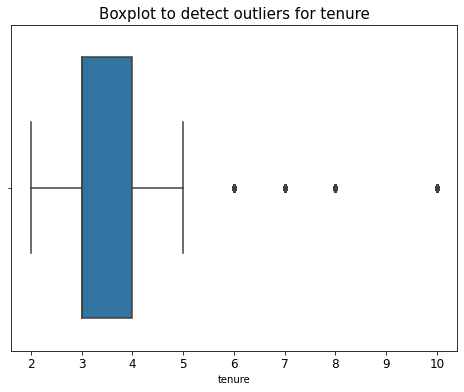

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8,6))
sns.boxplot(df1['tenure'])
plt.title('Boxplot to detect outliers for tenure', fontsize=15)
plt.xticks(fontsize=12)
plt.show()


The boxplot above shows that there are outliers in the tenure feature. It would help to investigate how many rows in the data contain outliers in the tenure column.

In [13]:
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When we get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.
<br/>Based on need of the models we will build afterwards, we might need to check outliers for other features we would use in the models. For now, a good practice is to check the outliers after EDA and feature engineering.

# pAce: Analyze Stage
- Perform EDA (Identify patterns and trends, analyze relationships between variables, understand data distributions, etc,. )



## Step 2. Data Exploration (Continue EDA)

Let's begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers and pencentage of people who left vs. stayed
print(df1['left'].value_counts())
print()
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


We can tell form the output above that the target variable 'left' in unbalanced. 16.6% of the employees left while 83.4% stayed. So the data is imbalanced, but it is not extremely imbalanced. If it was more severely imbalanced, we might need to resample the data to make it more balanced.

### Data visualizations

Let's then explore satifaction levels and tenure. We can create a stacked boxplot showing 'satisfaction_level' distribution for 'tenure', comparing the distributions of employees who stayed versus those who left.

Box plots are very useful in visualizing distributions within data, but they can be deceiving without the context of how big the sample sizes that they represent are. So, we will also plot a stacked histogram to visualize the distribution of 'tenure' for those who stayed and those who left.

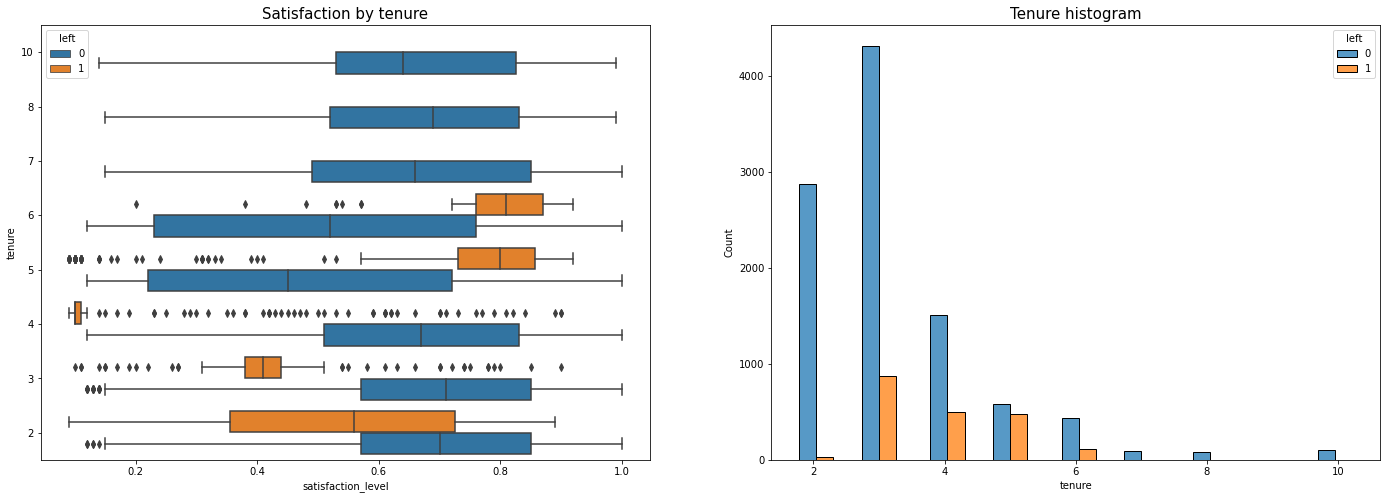

In [15]:
fig, ax =plt.subplots(1, 2, figsize=(24,8))
# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='15')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=6, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='15')
plt.show()

From the two plots above, we can see:

1. Employees who left seemingly fall into two categories: dissatisfies employees with shorter tenures and very satisfied employees with medium-length tenures.
2. Four-year employees who left have an unusually low satisfaction level. It's worthy investigating the reason causing this such as changes to company policy that might have affected poeple specifically at the four-year mark.
3. Employees with the longest tenure (7,8,10 years) didn't leave and their satisfaction levels aligned with those of newer employees who stayed.
4. The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

Then let's calculate the mean and median satisfaction score of employees who left and stayed.

In [16]:
df1.groupby(['left'])['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. 

Interestingly, among employees who stayed, the mean satisfaction socre appears to be slightly below the median score, while the case among the employees who left is just the opposite. This indicates that the distribution of satisfaction levels among those who stayed might be skewed to the left while the counterpart among those who left might be skwed to the right.


Now, let's explore 'average_monthly_hours' and 'number_project'. Similarly, we will create a stacked boxplot and a stacked histogram.

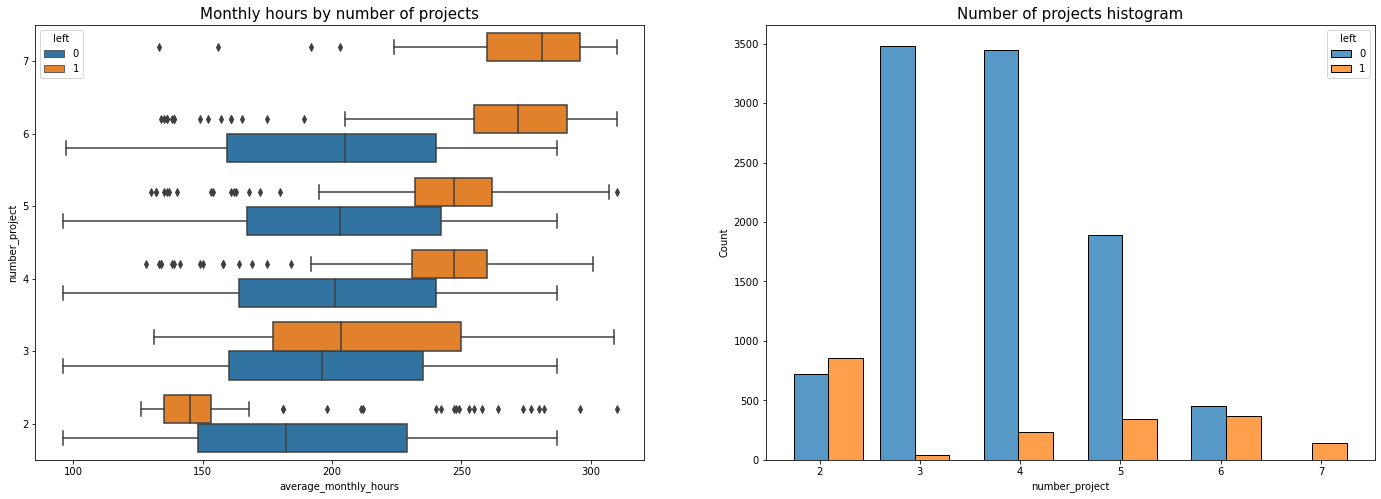

In [17]:
fig, ax =plt.subplots(1, 2, figsize=(24,8))
# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='15')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=4, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='15')
plt.show()


It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. All employees with seven projects lefts the company. The interquartile ranges of this group and those who left with six project was about 250-290 hours/month, which is much more than any other group.
2. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way leaving. For those in group B, it's reasonable to infer that they probably quit themselves. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 
3. The optimal number of projects for employees to work on might be 3/4 because the ratio of left/stayed is very small for these cohorts.
4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday- Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group -even those who didn't leave the company- worked considerably more hours than this. It seems that employees here are overworked. 

Now, let examine the average monthly hours versus the satisfaction levels.

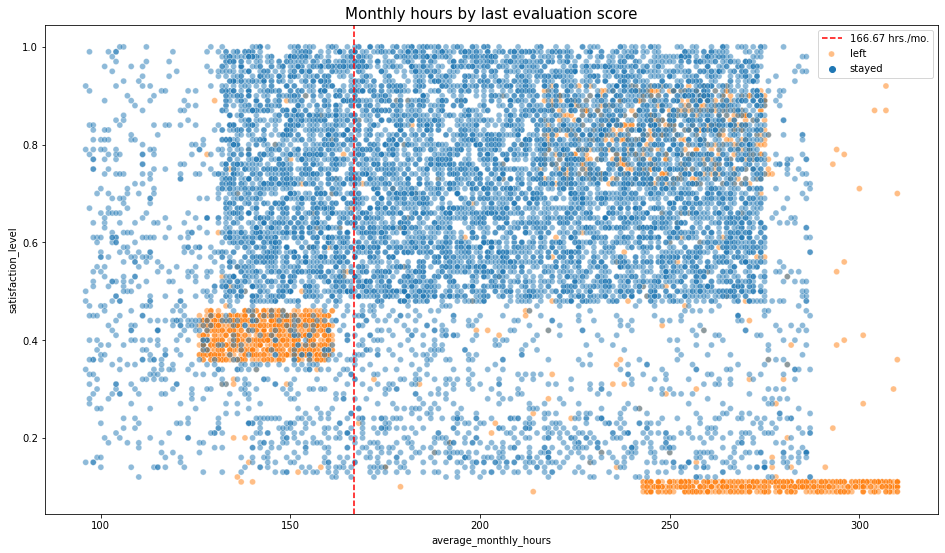

In [18]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
plt.axvline(x=166.67, color='r', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='15');

The scatterplot above shows that there was a sizeable group of employees who worked 240-320 hours per month (left-bottom of the plot). 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who left and worked 210-280 hours per month, and they had satisfaction levels ranging 0.7-0.9. The reason why thees employee with high satifation levels left might be that they decided to work on another company with haiger salary, higher rank or better career development.

(Note the strange shape of the distributions here is indicative of data manipulation or synthetic data.)

Next, let's examine salary levels for different tenures.

In [19]:
df1['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

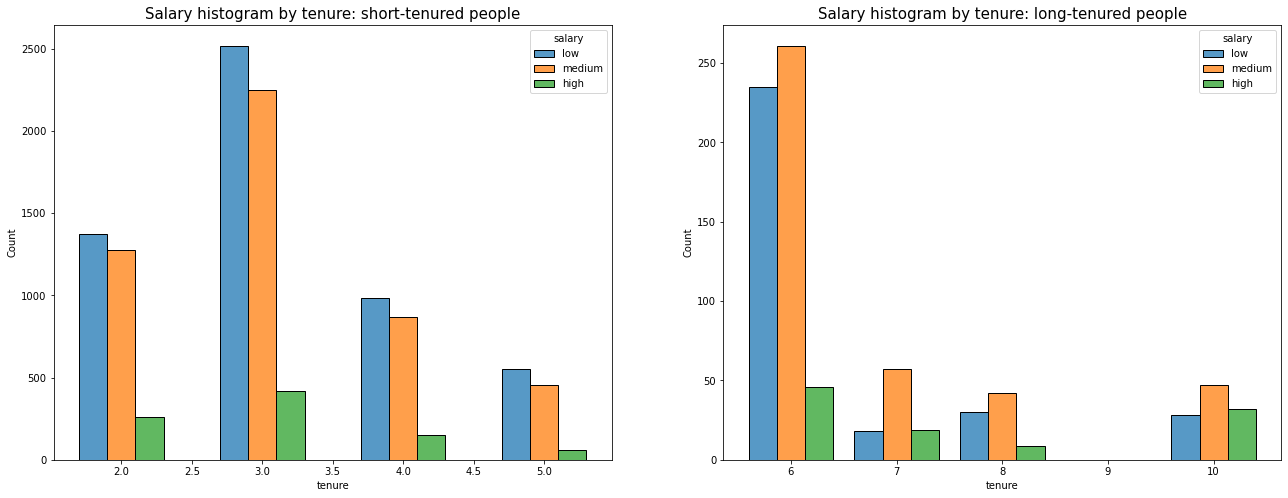

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] <= 5]
# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 5]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.6, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='15')
# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.8, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='15');


The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

Next, let's explore whether there's a correlation between working long hours and receiving high evaluation scores. 

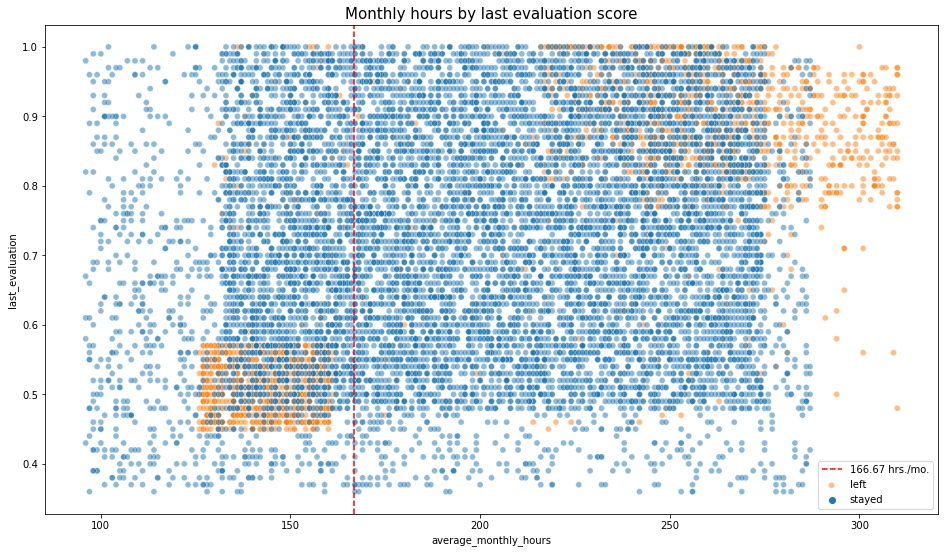

In [21]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5)
plt.axvline(x=166.67, color='r', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='15');

- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, let's examine whether employees who worked very long hours were promoted in the last five years.

In [22]:
df1['promotion_last_5years'].value_counts(normalize=True)

0    0.983071
1    0.016929
Name: promotion_last_5years, dtype: float64

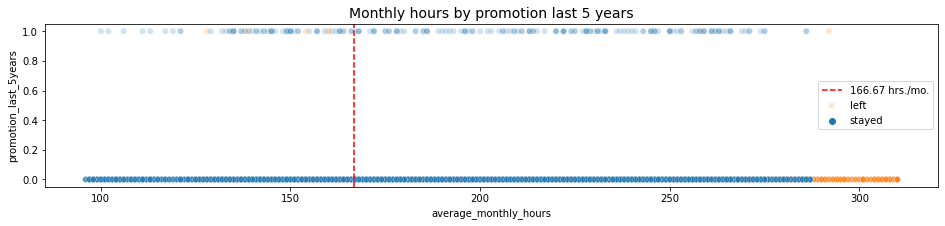

In [23]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.2)
plt.axvline(x=166.67, color='r', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

We can obsever from the polt above that:

- Very few employees who were promoted in the last five year left
- Very few employees who worked the most hours were promoted
- Almost all the employees who left were working the longest hours

Next, let's explore how the employees who left are distributed across departments.

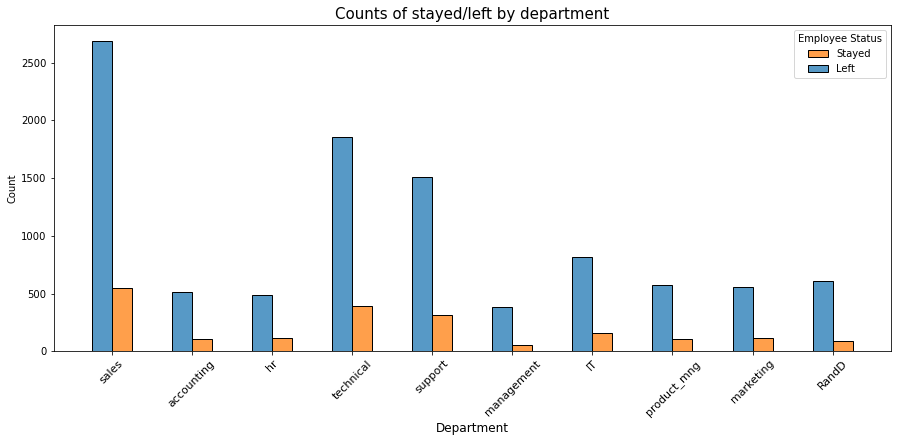

In [24]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(15,6))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.legend(title='Employee Status', labels=['Stayed','Left'])
plt.xticks(rotation=45, fontsize=11)
plt.xlabel('Department',fontsize=12)
plt.title('Counts of stayed/left by department', fontsize=15);


There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 

Lastly, let's check for strong correlations between variables in the data.

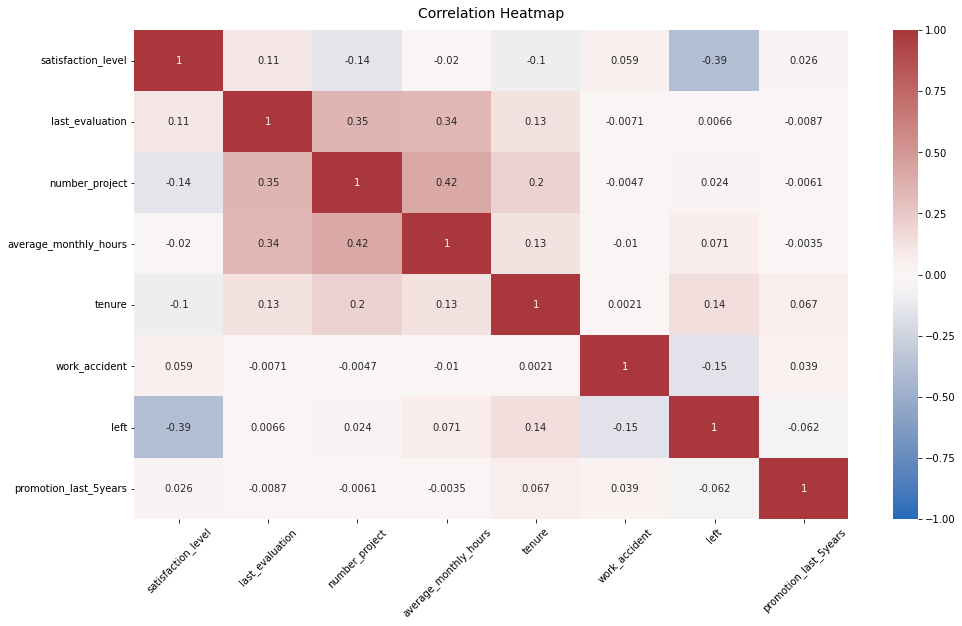

In [25]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.xticks(rotation=45)
plt.title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

# paCe: Construct Stage
- Determine which models are most appropriate(Logistic Regression model, or Tree-based Machine model)
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building & Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using selected features
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable 'left' can be either 1 (indicating employee left) or 0 (indicating employee stayed). 

### Model A: Logistic Regression Model


Before splitting the data, encode the non-numeric variables. There are two: 'department' and 'salary'. 

'department' is a categorical variable, which means we can dummy it for modeling. 

'salary' is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [28]:
df_a = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_a['salary'] = (
    df_a['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes)

# Dummy encode the `department` column
df_a = pd.get_dummies(df_a, drop_first=False)

# Display the new dataframe
df_a.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Create a heatmap to visualize how correlated variables are.
Consider which variables of our interast in examining correlations between.

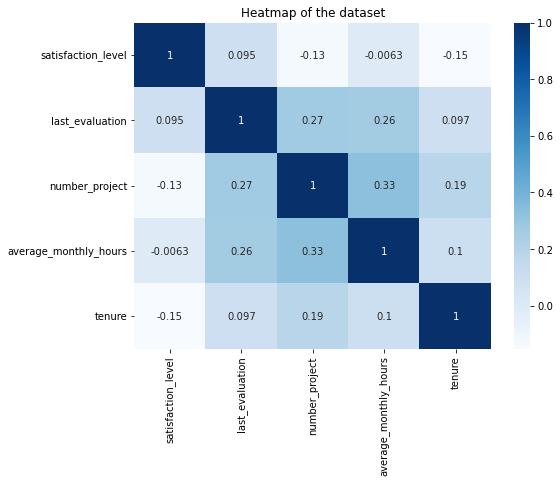

In [43]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_a[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="Blues")
plt.title('Heatmap of the dataset')
plt.show()

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to check the outliers of selected features and remove the outliers.

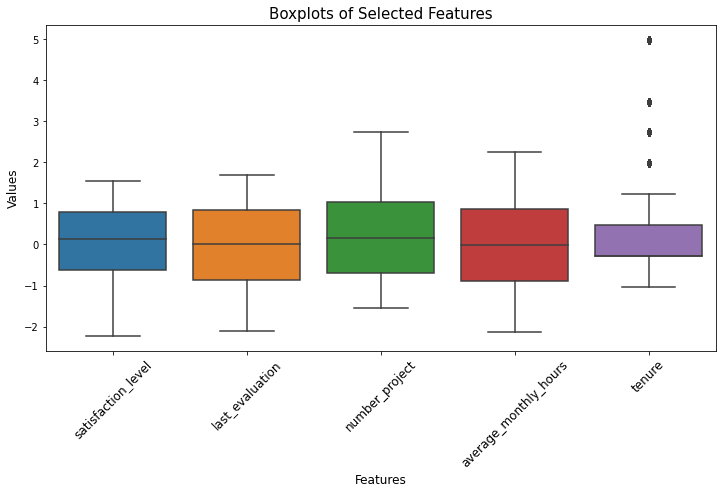

In [78]:
selected_features = df_a[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)
scaled_features = pd.DataFrame(scaled_features, columns=selected_features.columns)

# Create boxplots for the selected features
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_features)
plt.title('Boxplots of Selected Features', fontsize=15)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45,fontsize=12)
plt.show()

It can be seen from the boxplot that only 'tenure' has outliers so let's remove the outliers in the 'tenure' column that were identified earlier.

In [66]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_a[(df_a['tenure'] >= lower_limit) & (df_a['tenure'] <= upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [82]:
# Isolate the outcome variable and selected features
y = df_logreg['left']
X = df_logreg.drop('left', axis=1)

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=777)

# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=777, max_iter=500).fit(X_train, y_train)

We have built the logistics regression model, now let's test and evaluate it.

In [93]:
def plot_cm(y_true, y_pred, classes):
    """
    This function plots a confusion matrix using ConfusionMatrixDisplay.

    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        classes (list): List of class labels.
    """
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    cm_display.plot(values_format='', cmap='crest')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


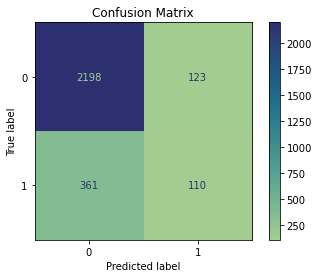

In [94]:
y_pred = log_clf.predict(X_test)

plot_cm(y_test, y_pred,log_clf.classes_ )

Among all the predictions, this model made 361 false negative and 123 false positive. In this case, false negative means the model inaccurately predicted employees who stayed as 'left' and false positive means the model inaccurately predicted employees who left as 'not left'.
<br/> Now, let's create a classification report that includes precision, recall, f-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [95]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.95      0.90      2321
    Predicted would leave       0.47      0.23      0.31       471

                 accuracy                           0.83      2792
                macro avg       0.67      0.59      0.61      2792
             weighted avg       0.79      0.83      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower. The imbalance in class distribution can lead to biased predictions. Logistic regression aims to minimize a loss function that penalizes misclassifications, and when one class is significantly smaller than the other, the model can become biased toward the majority class.  
<br/> To address this issue, we can try resampling to balance the class distribution, feature engineering to carefully select or engineer features to better capture patterns, or we can use different algorithms. Let't try tree-based models!

### Model B: Tree-based Model

#### Decision tree - Round 1
Build a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [106]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=777)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=5, refit='roc_auc')
# Fit the model
tree1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=777,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                        

In [107]:
# Check best parameters
print('Best parameters: ',tree1.best_params_)
# Check best AUC score on CV
print('AUC: ',tree1.best_score_)

Best parameters:  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
AUC:  0.9720457281964622


A high value of AUC indicates that the model has a strong ability to distinguish between the positive and negative classes in a binary classification problem. This is a strong AUC score indicating that this model can predict employees who will leave very well.
<br/>Next, let's define a functionnto extract all the scores from the grid search.

In [108]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [109]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.954977,0.914956,0.934504,0.978388,0.972046


All of these scores from the decision tree model are strong indicators of good model performance.

Recall that decision trees are prone to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. You could construct a random forest model next.

#### Random forest - Round 1
Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [110]:
# Instantiate model
rf = RandomForestClassifier(random_state=777)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')
# Fit the model
rf1.fit(X_train, y_train) # takes ~10min

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [120]:
# Define a path to the folder where you want to save the model
path = 'C:/Users/JY/Desktop/Project1/'
directory = 'C:/Users/JY/Desktop/Project1/'
os.makedirs(directory, exist_ok=True)

In [121]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [122]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

Use the functions defined above to save the model in a pickle file and then read it in.

In [125]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [126]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [127]:
# Check best parameters
print('Best parameters: ',rf1.best_params_)
# Check best AUC score on CV
print('AUC: ',rf1.best_score_)

Best parameters:  {'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500}
AUC:  0.981700040465638


In [128]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.954977  0.914956  0.934504  0.978388  0.972046
              model  precision    recall        F1  accuracy     auc
0  random forest cv   0.971458  0.917084  0.943476  0.981493  0.9817


The evaluation scores of the random forest model are better than those of the decision tree model. This indicates that the random forest model mostly outperforms the decision tree model.

Next, let's evaluate the final model on the test set.

Define a function that gets all the scores from a model's predictions.

In [129]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [130]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.968958,0.927813,0.947939,0.982808,0.960891


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, we can be more confident that our model's performance on this data is representative of how it will perform on new, unseeen data.

#### Feature Engineering

We might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when we use data to train our model that should not be used during training, either because it appears in the test data or because it's not data that we'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the 'average_monthly_hours' column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours. 

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

Let's proceed by dropping 'satisfaction_level' and creating a new feature that roughly captures whether an employee is overworked. We could call this new feature 'overworked', which will be a binary variable.

In [137]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_a.drop('satisfaction_level', axis=1)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [138]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

Considering occasional overtime work, let's define being overworked as working more than 180 hours per month on average.

To make the 'overworked' column binary,we reassign the column using a boolean mask.


In [139]:
# Define `overworked` as working > 180 hrs/month
# `.astype(int)` converts all `True` to `1` and all `False` to `0` 
df2['overworked'] = (df2['overworked'] > 180).astype(int)
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

#### Decision tree - Round 2

In [140]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Isolate the features and target variables
y = df2['left']
X = df2.drop('left', axis=1)

# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=787)

#### Decision tree - Round 2

In [141]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=787)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=5, refit='roc_auc')

# Fit the model
tree2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=787,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                        

In [142]:
# Check best parameters
print('Best parameters: ',tree2.best_params_)
# Check best AUC score on CV
print('AUC: ',tree2.best_score_)

Best parameters:  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}
AUC:  0.9580504784778492


This model performs pretty well, even without satisfaction levels and detailed hours worked data. 

Next, check the other scores.

In [143]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.954977  0.914956  0.934504  0.978388  0.972046
               model  precision    recall        F1  accuracy      auc
0  decision tree2 cv   0.841297  0.900875  0.869143  0.954743  0.95805


Other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

#### Random forest - Round 2

In [144]:
# Instantiate model
rf = RandomForestClassifier(random_state=787)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')

rf2.fit(X_train, y_train) # Takes ~7 mins

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [147]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [148]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [149]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [150]:
# Check best AUC score on CV
rf2.best_score_

0.9656155634366606

In [151]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy      auc
0  decision tree2 cv   0.841297  0.900875  0.869143  0.954743  0.95805
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.853715  0.900215  0.876193  0.957636  0.965616


All scores increased more or less except that recall dropped slightly. Overall, the random forest performs better than the decision tree.

In [152]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.871401,0.911647,0.89107,0.962975,0.942423


This seems to be a stable, well-performing final model. 

Plot a confusion matrix to visualize how well it predicts on the test set.

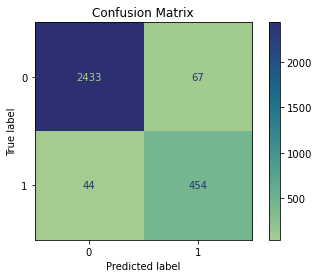

In [154]:
y_pred = rf2.best_estimator_.predict(X_test)
plot_cm(y_test, y_pred, rf2.classes_)

The model predicts more false negatives than false positives, which means that some employees may be identified as 'would stay', when that's actually not the case. But this is still a strong model.

For exploratory purpose, we can inspect the splits of the decision tree model and the most important features in the random forest model. 

#### Decision tree splits

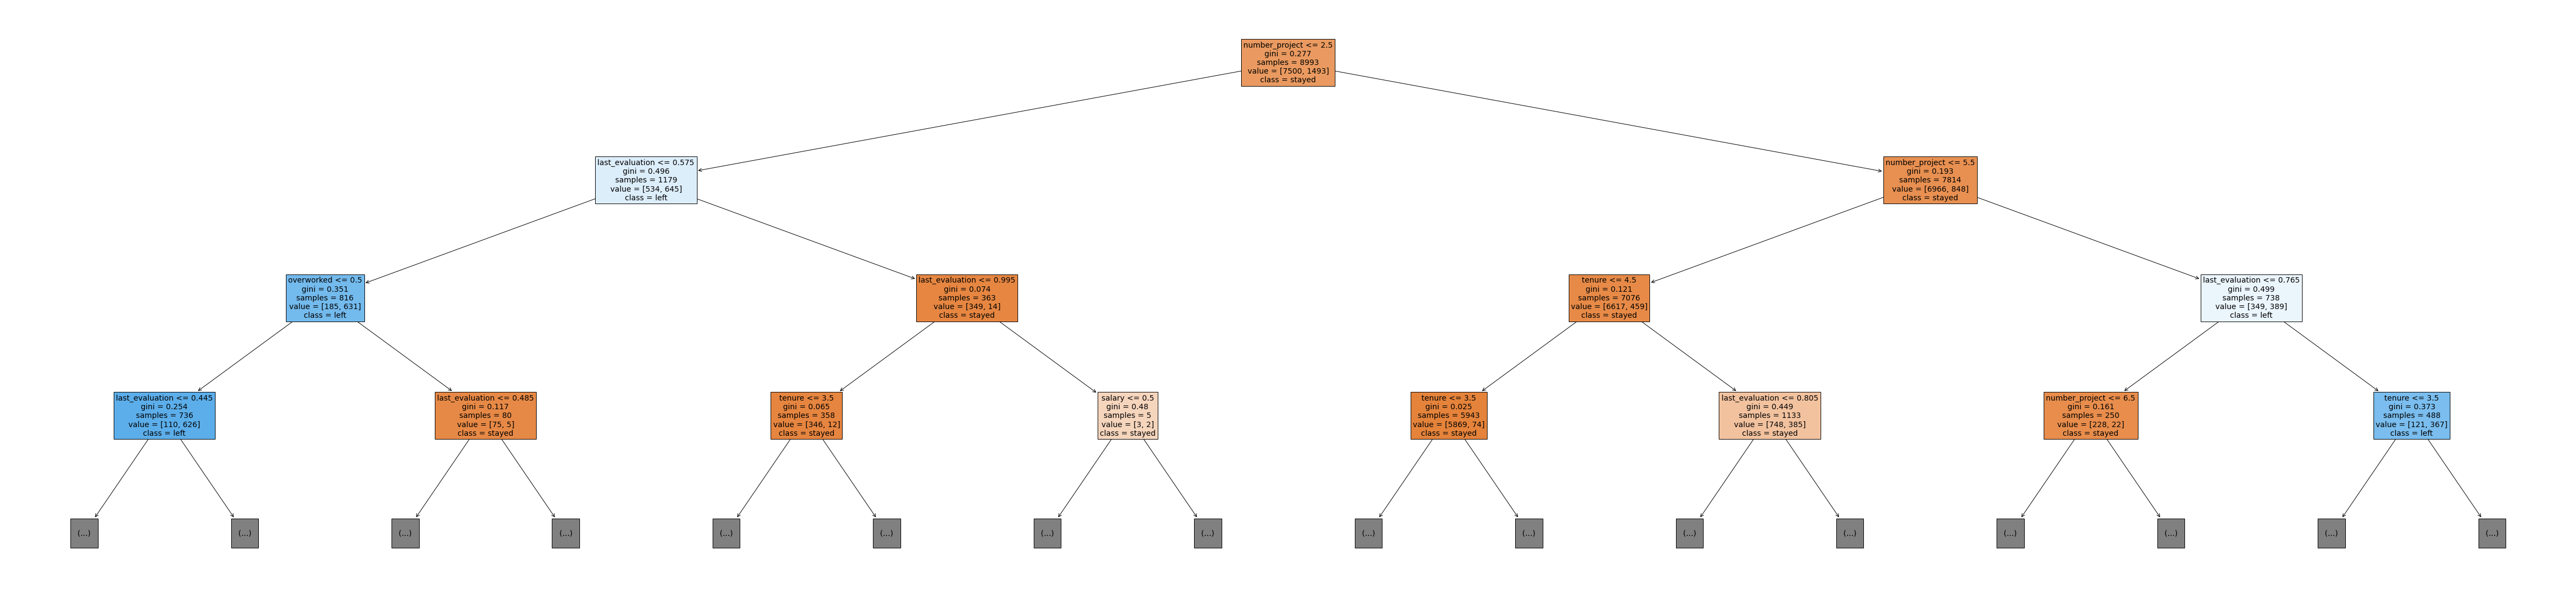

In [156]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=3, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

A visual representation of the tree pinpoint where the splits in the data are occurring. For example, the root node here split the data based on 'number_project' feature with the threshold of 2.5. It gives us insight into which features are more influential in making decisions within the model. 
<br/>Note that you can double-click on the tree image to zoom in on it and inspect the splits.

#### Decision tree feature importance

In [157]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.389626
last_evaluation,0.337541
tenure,0.177647
overworked,0.091276
salary,0.000853
department_IT,0.000766
department_management,0.000747
department_hr,0.000635
work_accident,0.000346
department_support,0.000277


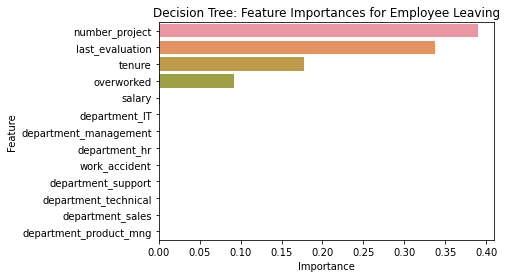

In [158]:
# Visualize the decision tree feature importances.
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, `number_project`,`last_evaluation`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

#### Random forest feature importance

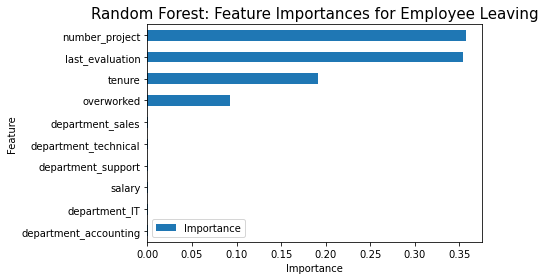

In [146]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=15)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `number_project`, `last_evaluation`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are almost the same as the ones used by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 79%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 95.8%, precision of 84.1%, recall of 90.0%, f1-score of 86.9%, and accuracy of 95.5%, on the test set. The random forest modestly outperformed the decision tree model. 

## Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Optimize project allocation to prevent employees from working excessive overtime or getting burnt out and recognize their attribution.
* Reevaluate employees who have been with the company for at least four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
* Consider promoting long-serving employees and those with talent,
* Enhance the evaluation system to ensure that employees who contribute, possess talent, or have demonstrated prolonged effective working hours receive the deserved evaluation, rewards, or promotions.


**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 
